In [1]:
# libraries imports
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt

In [2]:
#function to extract data
def getDF(url):
    response = requests.get(url).json()
    labels = response[0]
    rows = response[1:]
    df = pd.DataFrame(rows, columns=labels)
    return df

In [3]:
# urls
cs_url = 'https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,FIRMPDEMP&for=us:*&NAICS2017=00&key=12df6eb237c572da2e3597a242e78b54c2610d88'
bc_url = 'https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=us:*&QDESC_LABEL=OWNRNUM&NAICS2017=00&key=12df6eb237c572da2e3597a242e78b54c2610d88'
o_url = 'https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP&for=us:*&NAICS2017=00&QDESC_LABEL=USBORN&key=12df6eb237c572da2e3597a242e78b54c2610d88'
t_url = 'https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=us:*&NAICS2017=00&key=12df6eb237c572da2e3597a242e78b54c2610d88'

In [4]:
# getting dataframes from urls 
comp_sum_df = getDF(cs_url)
bus_char_df = getDF(bc_url)
owner_df = getDF(o_url)
tech_df = getDF(t_url)

In [5]:
list = [comp_sum_df,bus_char_df,owner_df,tech_df]
for line in list:
    print(line.columns)

Index(['NAME', 'GEO_ID', 'NAICS2017_LABEL', 'SEX', 'SEX_LABEL', 'ETH_GROUP',
       'ETH_GROUP_LABEL', 'RACE_GROUP', 'RACE_GROUP_LABEL', 'VET_GROUP',
       'VET_GROUP_LABEL', 'FIRMPDEMP', 'NAICS2017', 'us'],
      dtype='object')
Index(['GEO_ID', 'NAME', 'NAICS2017_LABEL', 'SEX', 'SEX_LABEL', 'ETH_GROUP',
       'ETH_GROUP_LABEL', 'RACE_GROUP', 'RACE_GROUP_LABEL', 'VET_GROUP',
       'VET_GROUP_LABEL', 'QDESC', 'QDESC_LABEL', 'BUSCHAR', 'BUSCHAR_LABEL',
       'FIRMPDEMP', 'RCPPDEMP', 'EMP', 'PAYANN', 'QDESC_LABEL', 'NAICS2017',
       'us'],
      dtype='object')
Index(['GEO_ID', 'NAME', 'NAICS2017_LABEL', 'OWNER_SEX', 'OWNER_SEX_LABEL',
       'OWNER_ETH', 'OWNER_ETH_LABEL', 'OWNER_RACE', 'OWNER_RACE_LABEL',
       'OWNER_VET', 'OWNER_VET_LABEL', 'QDESC', 'OWNCHAR', 'OWNCHAR_LABEL',
       'OWNPDEMP', 'NAICS2017', 'QDESC_LABEL', 'us'],
      dtype='object')
Index(['GEO_ID', 'NAME', 'NAICS2017_LABEL', 'SEX', 'SEX_LABEL', 'ETH_GROUP',
       'ETH_GROUP_LABEL', 'RACE_GROUP', 'RACE_GROU

In [6]:
# keeping certain columns and renaming for ease of access

comp_sum = comp_sum_df[['NAME','GEO_ID','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','FIRMPDEMP']].copy()
comp_sum.rename(columns={'FIRMPDEMP':'FIRMPDEMP_cs'},inplace=True)

bus_char = bus_char_df[['NAME','GEO_ID','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','QDESC', 'QDESC_LABEL', 'BUSCHAR', 'BUSCHAR_LABEL','FIRMPDEMP']].copy()
bus_char.rename(columns={'FIRMPDEMP':'FIRMPDEMP_bc'},inplace=True)

owner = owner_df[['NAME','GEO_ID','OWNER_SEX_LABEL','OWNER_ETH_LABEL','OWNER_RACE_LABEL','OWNER_VET_LABEL','QDESC','QDESC_LABEL','OWNCHAR','OWNCHAR_LABEL','OWNPDEMP']].copy()
owner.rename(columns={'OWNER_SEX_LABEL':'SEX_LABEL','OWNER_ETH_LABEL':'ETH_GROUP_LABEL','OWNER_RACE_LABEL':'RACE_GROUP_LABEL','OWNER_VET_LABEL':'VET_GROUP_LABEL'},inplace=True)
owner.rename(columns={'QDESC':'QDESC_o','QDESC_LABEL':'QDESC_LABEL_o'},inplace=True)
owner.loc[owner['RACE_GROUP_LABEL'] == 'All owners of respondent firms', 'RACE_GROUP_LABEL'] = 'Total'
owner.loc[owner['SEX_LABEL'] == 'All owners of respondent firms', 'SEX_LABEL'] = 'Total'
owner.loc[owner['VET_GROUP_LABEL'] == 'All owners of respondent firms', 'VET_GROUP_LABEL'] = 'Total'
owner.loc[owner['ETH_GROUP_LABEL'] == 'All owners of respondent firms', 'ETH_GROUP_LABEL'] = 'Total'

tech = tech_df[['NAME','GEO_ID','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','TECHUSE', 'TECHUSE_LABEL','FIRMPDEMP']].copy()
tech.rename(columns={'FIRMPDEMP':'FIRMPDEMP_t'},inplace=True)

In [7]:
list = [comp_sum,bus_char,owner,tech]
for line in list:
    print(line.columns)

Index(['NAME', 'GEO_ID', 'SEX_LABEL', 'ETH_GROUP_LABEL', 'RACE_GROUP_LABEL',
       'VET_GROUP_LABEL', 'FIRMPDEMP_cs'],
      dtype='object')
Index(['NAME', 'GEO_ID', 'SEX_LABEL', 'ETH_GROUP_LABEL', 'RACE_GROUP_LABEL',
       'VET_GROUP_LABEL', 'QDESC', 'QDESC_LABEL', 'QDESC_LABEL', 'BUSCHAR',
       'BUSCHAR_LABEL', 'FIRMPDEMP_bc'],
      dtype='object')
Index(['NAME', 'GEO_ID', 'SEX_LABEL', 'ETH_GROUP_LABEL', 'RACE_GROUP_LABEL',
       'VET_GROUP_LABEL', 'QDESC_o', 'QDESC_LABEL_o', 'OWNCHAR',
       'OWNCHAR_LABEL', 'OWNPDEMP'],
      dtype='object')
Index(['NAME', 'GEO_ID', 'SEX_LABEL', 'ETH_GROUP_LABEL', 'RACE_GROUP_LABEL',
       'VET_GROUP_LABEL', 'TECHUSE', 'TECHUSE_LABEL', 'FIRMPDEMP_t'],
      dtype='object')


In [8]:
# 1: merge company summary with business characteristics
comp_sum_bus_char = comp_sum.merge(bus_char , on=['NAME','GEO_ID','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL'])
# 2-1: merging on technology characteristics with company summary and business characteristics
comp_sum_bus_char_tech = comp_sum_bus_char.merge(tech, on=['NAME','GEO_ID','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL'])
# 2-2: merging on owner characteristics with company summary and business characteristics instead
comp_sum_bus_char_owner = comp_sum_bus_char.merge(owner, on=['NAME','GEO_ID','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL'])
# 3-1: appending to 2-1 with owner characteristics
comp_sum_bus_char_tech_owner = pd.concat([comp_sum_bus_char_tech,owner],axis=1)
# 3-2: appending to 2-2 with technology characteristics
comp_sum_bus_char_owner_tech = pd.concat([comp_sum_bus_char_owner,tech],axis=1)


In [9]:
# pulling another owner table to get more information for visuals
owner_url = 'https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP&for=us:*&NAICS2017=00&QDESC_LABEL=*'
all_owner = getDF(owner_url)

In [10]:
# creating dataframe for gender and education
gender_educ = all_owner.loc[(all_owner.QDESC_LABEL == 'EDUC')&(all_owner.OWNER_SEX != '001')&(all_owner.OWNER_ETH == '001')&(all_owner.OWNER_VET == '001')&(all_owner.OWNER_RACE == '00')]
gender_educ = gender_educ.loc[(gender_educ.OWNCHAR_LABEL != 'Total reporting')]
gender_educ = gender_educ[['OWNER_SEX_LABEL','OWNCHAR_LABEL','OWNPDEMP']]
gender_educ['OWNPDEMP'] = gender_educ['OWNPDEMP'].astype(int)

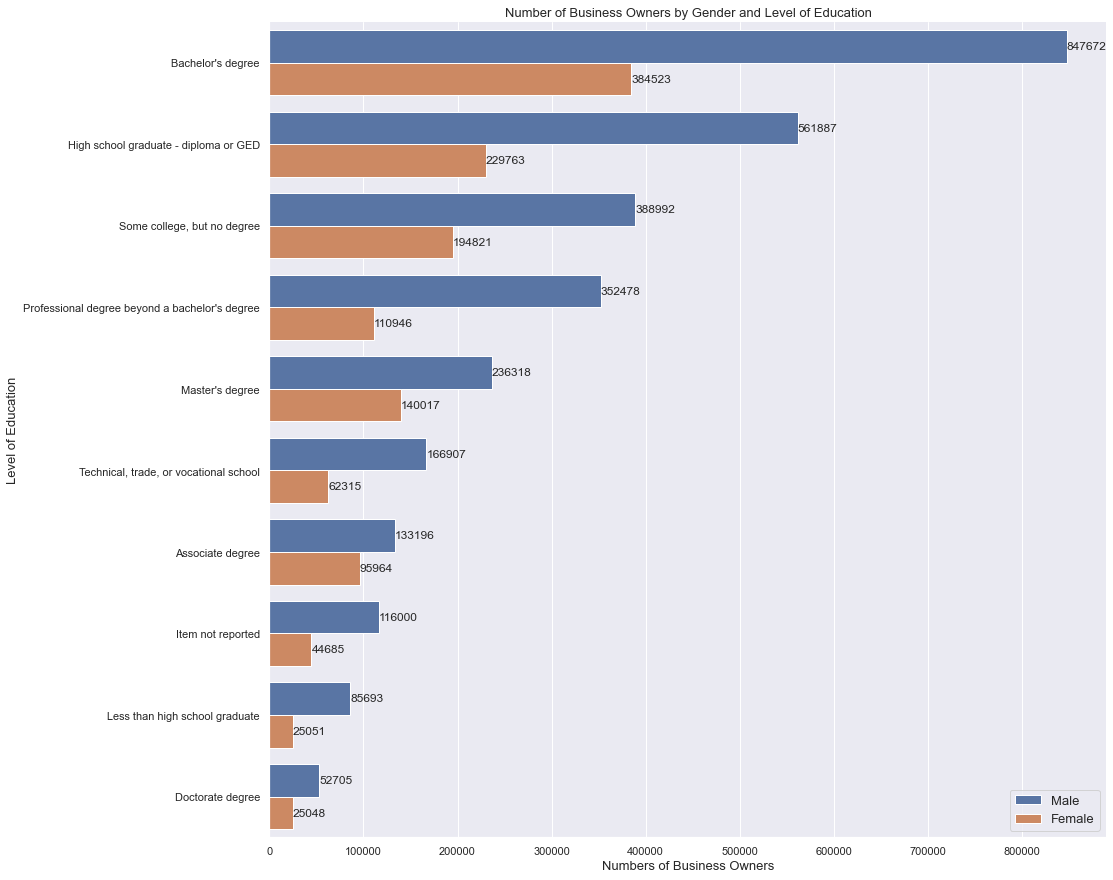

In [11]:
# creating visual for gender and education
plot_gender_educ = gender_educ.sort_values(by='OWNPDEMP',ascending=False)

sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set(rc={'figure.figsize':(15, 15)})
ax = sns.barplot(data=plot_gender_educ, x='OWNPDEMP', y='OWNCHAR_LABEL', hue='OWNER_SEX_LABEL')  
plt.tick_params(labelsize=11)
plt.title('Number of Business Owners by Gender and Level of Education', fontsize=13)
plt.xlabel('Numbers of Business Owners', fontsize=13)
plt.ylabel('Level of Education', fontsize=13)
sns.despine()
plt.legend(fontsize=13)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [12]:
# creating dataframe for gender and age in 2018
gender_age = all_owner.loc[(all_owner.QDESC_LABEL == 'OWNRAGE')&(all_owner.OWNER_SEX != '001')&(all_owner.OWNER_ETH == '001')&(all_owner.OWNER_VET == '001')&(all_owner.OWNER_RACE == '00')]
gender_age = gender_age.loc[(gender_age.OWNCHAR_LABEL != 'Total reporting')]
gender_age = gender_age[['OWNER_SEX_LABEL','OWNCHAR_LABEL','OWNPDEMP']]
gender_age['OWNPDEMP'] = gender_age['OWNPDEMP'].astype(int)

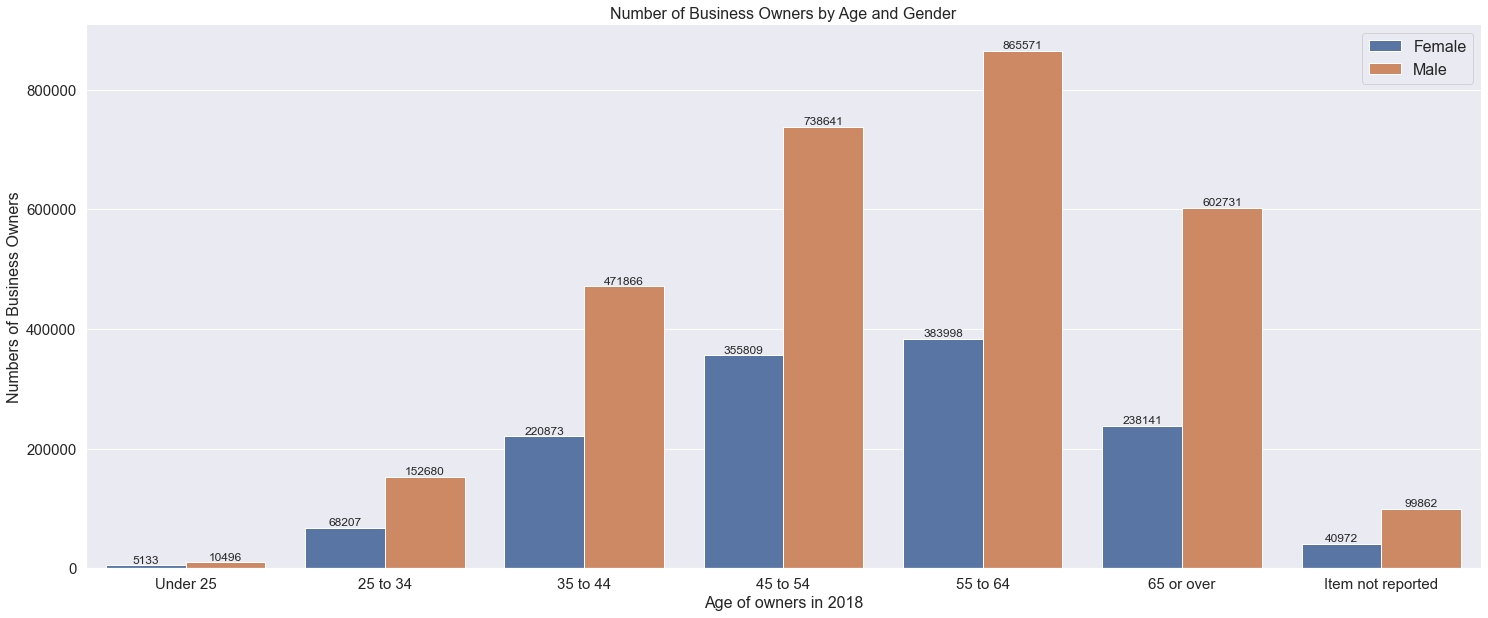

In [13]:
# creating visual for gender and age in 2018
sns.set(rc={"figure.figsize":(25, 10)})
ax = sns.barplot(data=gender_age, x="OWNCHAR_LABEL", y='OWNPDEMP', hue='OWNER_SEX_LABEL')
plt.tick_params(labelsize=15)
plt.title('Number of Business Owners by Age and Gender', fontsize=16)
plt.xlabel('Age of owners in 2018', fontsize=16)
plt.ylabel('Numbers of Business Owners', fontsize=16)
sns.despine()
for i in ax.containers:
    ax.bar_label(i,)
plt.legend(fontsize=16)
plt.show()

In [14]:
# creating dataframe for veteran status and education, and drilling down to only veterans
vet_educ = all_owner.loc[(all_owner.QDESC_LABEL == 'EDUC')&(all_owner.OWNER_SEX == '001')&(all_owner.OWNER_ETH == '001')&(all_owner.OWNER_VET != '001')&(all_owner.OWNER_RACE == '00')]
vet_educ = vet_educ.loc[(vet_educ.OWNCHAR_LABEL != 'Total reporting')]
vet_educ = vet_educ[['OWNER_VET_LABEL','OWNCHAR_LABEL','OWNPDEMP']]
vet_educ['OWNPDEMP'] = vet_educ['OWNPDEMP'].astype(int)
veteran_edu = vet_educ.loc[(vet_educ.OWNER_VET_LABEL == 'Veteran')].copy()
sorted_veteran_edu = veteran_edu.sort_values(by='OWNPDEMP',ascending=False)

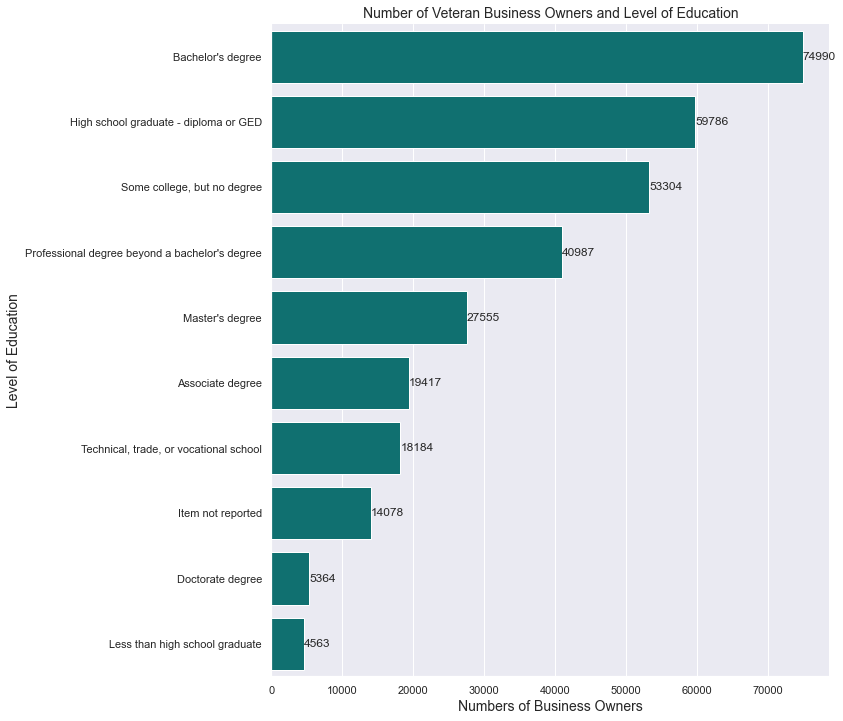

In [15]:
# creating visual for veteran and education
sns.set(rc={"figure.figsize":(10, 12)})
ax = sns.barplot(data=sorted_veteran_edu, x='OWNPDEMP', y='OWNCHAR_LABEL', orient='h',color='teal')
for i in ax.containers:
    ax.bar_label(i,)
plt.tick_params(labelsize=11)
plt.title('Number of Veteran Business Owners and Level of Education', fontsize=14)
plt.xlabel('Numbers of Business Owners', fontsize=14)
plt.ylabel('Level of Education', fontsize=14)
sns.despine()
plt.show()
